#**Analysis of International Trade Data**

By: Patrick Haggerty, Ari Lander, and Enadi Pasholli

#**SECTION 1 - Introcution**

Dataset in use: https://www.kaggle.com/sagarkandpal/effectsofcovid19ontradeat14july2021

Since we are currently experiencing a country-wide shortage in multiple items, we wanted to compare the effects of the pandemic on international supply chain from pre-pandemic to this year. The dataset we have selected details international trade information from January 1, 2015 through July 14, 2021.


Below is the data dictionary for the data being used.

##**Data Dictionary**

| Field Name  |  Description |
|----------|-------------|
| Direction | Determines whether trade was export, import, or reimport |
| Year |    Year that trade took place   |
| Date | Exact date of trade activity |
| Weekday | Name of the weekday of value in Date |
|Country| Country that made trade |
|Commodity| Item involved in trade |
|Transport_Mode| Method of item transportation |
|Measure| How trade is measured |
|Value| Dollar Value 
|Cumulative| Total dollar value added by each trade through dataset

##**Why use this data? What is the significance?**

Global trade is what keeps all of humanity's lives afloat. Without efficient importing and exporting by countries, shortages of vital materials for manufacturing and final products can cause major problems for both corporations and personal lives.

With such significance on global trade and the pandemic shutting the world down through different time periods, we look to see how much the pandemic has impacted trade. This information is very useful to players in the supply chain such as manufacturers, importers, and exporters. The findings we are seeking will provide useful insights to the current status of international trade.

#**SECTION 2 - Research Questions**



##**Questions We Look to Answer**

As we want to provide meaningful insights to manufacturers, importers, and exporters, we believe that these questions will result in such insights:

1. Which country contributed the most to world trade?
2. What commodity was traded the most in 2019? 2020?
3. How was China's trade impacted by COVID in 2020 compared to other countries?
4. How was China affected in terms of value in imports vs exports?

#**SECTION 3 - Loading and Prepping the Data**

### **Import Libraries**

In [2]:
# Import Libaries needed for Project
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import datetime as dt


### **Load the Data**

In [3]:
# Load data from Github
# Data source originally from kaggle at: https://www.kaggle.com/sagarkandpal/effectsofcovid19ontradeat14july2021
data_url = 'https://raw.githubusercontent.com/patrickjhaggerty/DATA_6505_Final/main/effects-of-covid-19-on-trade-at-14-July-2021-provisional.csv'
trade_data = pd.read_csv(data_url, 
                         parse_dates=['Date'], dayfirst=True) # Important for the date field, its in European format


### **Review Data Frame**

In [4]:
# Previews the data
trade_data.head(5)

,Direction,Year,Date,Weekday,Country,Commodity,Transport_Mode,Measure,Value,Cumulative
0,Exports,2015,2015-01-01,Thursday,All,All,All,$,104000000,104000000
1,Exports,2015,2015-01-02,Friday,All,All,All,$,96000000,200000000
2,Exports,2015,2015-01-03,Saturday,All,All,All,$,61000000,262000000
3,Exports,2015,2015-01-04,Sunday,All,All,All,$,74000000,336000000
4,Exports,2015,2015-01-05,Monday,All,All,All,$,105000000,442000000


In [ ]:
# Counts the number of rows and fields
trade_data.shape

(104665, 10)

In [ ]:
# Lists the field names
trade_data.columns

Index(['Direction', 'Year', 'Date', 'Weekday', 'Country', 'Commodity',
       'Transport_Mode', 'Measure', 'Value', 'Cumulative'],
      dtype='object')

In [ ]:
# Lists the field data types
trade_data.dtypes

Direction                 object
Year                       int64
Date              datetime64[ns]
Weekday                   object
Country                   object
Commodity                 object
Transport_Mode            object
Measure                   object
Value                      int64
Cumulative                 int64
dtype: object

In [ ]:
# A check of which Commodities exist in DF
trade_data['Commodity'].value_counts()

All                                42949
Milk powder, butter, and cheese    14210
Meat and edible offal              14178
Logs, wood, and wood articles       9490
Fish, crustaceans, and molluscs     7138
Non-food manufactured goods         4774
Electrical machinery and equip      4771
Mechanical machinery and equip      4768
Fruit                               2387
Name: Commodity, dtype: int64

In [ ]:
# A check of which Countries exist in DF
trade_data['Country'].value_counts()

All                            47722
China                          26040
East Asia (excluding China)     7157
United States                   7039
Australia                       4774
United Kingdom                  4772
Japan                           2387
Total (excluding China)         2387
European Union (27)             2387
Name: Country, dtype: int64

In [ ]:
# Checks which years data is available for
trade_data['Year'].value_counts().sort_index()

2015    16005
2016    16028
2017    15995
2018    16019
2019    16017
2020    16031
2021     8570
Name: Year, dtype: int64

### **Look for Missing Data**

In [ ]:
# Finds the percent of values that are null in a given field
trade_data.isnull().mean()

Direction         0.0
Year              0.0
Date              0.0
Weekday           0.0
Country           0.0
Commodity         0.0
Transport_Mode    0.0
Measure           0.0
Value             0.0
Cumulative        0.0
dtype: float64

Note: Looking at the percentage of missing data in each column, there is no missing data so we will include all columns in our dataset moving foward.

In [ ]:
# Looks at fields where quantity is blank
# trade_data[trade_data['Value'].isna()].head(5)
# Data has no blanks

In [ ]:
# Checks if there's measures other than dollars
trade_data['Measure'].value_counts().sort_index()
# Will need to filter out the tonnes, data won't aggregate correctly

$         83339
Tonnes    21326
Name: Measure, dtype: int64

### **Add Additional Fields**

In [5]:
# Adds a month field
trade_data['Month'] = trade_data['Date'].dt.month
trade_data['Month'].value_counts().sort_index()

1     9492
2     8681
3     9521
4     9205
5     9530
6     9217
7     8778
8     8150
9     7885
10    8162
11    7908
12    8136
Name: Month, dtype: int64

In [6]:
# Checks how far the data goes into 2021
trade_data[trade_data.Year == 2021].pivot_table(index=['Year','Month'], values='Value', aggfunc='sum')
# Looks like its only half way through July

Value
Year Month             
2021 1      36814505000
     2      36316355000
     3      46658039000
     4      42605652000
     5      46722805000
     6      48096793000
     7      21456113000

### **Check Data Types**

In [ ]:
trade_data.head(5)

,Direction,Year,Date,Weekday,Country,Commodity,Transport_Mode,Measure,Value,Cumulative,Month
0,Exports,2015,2015-01-01,Thursday,All,All,All,$,104000000,104000000,1
1,Exports,2015,2015-01-02,Friday,All,All,All,$,96000000,200000000,1
2,Exports,2015,2015-01-03,Saturday,All,All,All,$,61000000,262000000,1
3,Exports,2015,2015-01-04,Sunday,All,All,All,$,74000000,336000000,1
4,Exports,2015,2015-01-05,Monday,All,All,All,$,105000000,442000000,1


In [ ]:
trade_data.dtypes

Direction                 object
Year                       int64
Date              datetime64[ns]
Weekday                   object
Country                   object
Commodity                 object
Transport_Mode            object
Measure                   object
Value                      int64
Cumulative                 int64
Month                      int64
dtype: object

In [7]:
trade_data['Direction'] = trade_data['Direction'].astype('string')
trade_data['Weekday'] = trade_data['Weekday'].astype('string')
trade_data['Country'] = trade_data['Country'].astype('string')
trade_data['Commodity'] = trade_data['Commodity'].astype('string')
trade_data['Transport_Mode'] = trade_data['Transport_Mode'].astype('string')
trade_data['Measure'] = trade_data['Measure'].astype('string')
trade_data.dtypes

Direction                 string
Year                       int64
Date              datetime64[ns]
Weekday                   string
Country                   string
Commodity                 string
Transport_Mode            string
Measure                   string
Value                      int64
Cumulative                 int64
Month                      int64
dtype: object

In [ ]:
trade_data.head(5)

,Direction,Year,Date,Weekday,Country,Commodity,Transport_Mode,Measure,Value,Cumulative,Month
0,Exports,2015,2015-01-01,Thursday,All,All,All,$,104000000,104000000,1
1,Exports,2015,2015-01-02,Friday,All,All,All,$,96000000,200000000,1
2,Exports,2015,2015-01-03,Saturday,All,All,All,$,61000000,262000000,1
3,Exports,2015,2015-01-04,Sunday,All,All,All,$,74000000,336000000,1
4,Exports,2015,2015-01-05,Monday,All,All,All,$,105000000,442000000,1


### **Describe Data Frame**

In [ ]:
trade_data.describe().round(2)

,Year,Value,Cumulative,Month
count,104665.00,1.046650e+05,1.046650e+05,104665.00
mean,2017.79,2.863475e+07,4.927747e+09,6.30
std,1.90,5.175917e+07,9.378260e+09,3.43
min,2015.00,0.000000e+00,0.000000e+00,1.00
25%,2016.00,1.000000e+06,1.080000e+08,3.00
50%,2018.00,8.000000e+06,1.348000e+09,6.00
75%,2019.00,2.700000e+07,4.549000e+09,9.00
max,2021.00,5.490000e+08,6.436600e+10,12.00


### **Create New Data Frames**

In [17]:
# Filters out tonnes from dollars
td_doll = trade_data.loc[(trade_data['Measure'] == '$')]
                                                            #& (trade_data['Date'] <= '2021-06-01')]
                                                            #& (trade_data['Country'] != 'All') & 
                                                            #(trade_data['Commodity'] != 'All') & 
                                                            #(trade_data['Transport_Mode'] != 'All')]

td_Ton = trade_data.loc[(trade_data['Measure'] == 'Tonnes')]
                                                            #& (trade_data['Country'] != 'All') & 
                                                            #(trade_data['Commodity'] != 'All')] # Transport mode only has all
#td_Ton.head(5)
td_doll.head(5)

,Direction,Year,Date,Weekday,Country,Commodity,Transport_Mode,Measure,Value,Cumulative,Month
0,Exports,2015,2015-01-01,Thursday,All,All,All,$,104000000,104000000,1
1,Exports,2015,2015-01-02,Friday,All,All,All,$,96000000,200000000,1
2,Exports,2015,2015-01-03,Saturday,All,All,All,$,61000000,262000000,1
3,Exports,2015,2015-01-04,Sunday,All,All,All,$,74000000,336000000,1
4,Exports,2015,2015-01-05,Monday,All,All,All,$,105000000,442000000,1


***Important notes***
The data appears to only have one of Country/Commodity/Transport mode at a time, the other two categories will say "All". So we will need to evaluate JUST the US or JUST electronics.

You have to have Country set to "All" or "China" if you want to look at Commodity.

You have to have Commodity set to "All" if you want to look at Country.

#**SECTION 4 - Main Anaylsis**

In this section we will analyze and review data to answer our analytical questions.

### Q1: Which country contributed the most to world trade?





When looking at the dataset in its entirety, there are nine different options for country. While some are single countries like China and the United States, there are also combinations like East Asia and the European Union. Based off of prior knowledge and experience with the amount of goods China interacts with for both imports and exports, we assume that they will make up the majority of the total contribution by a single country.

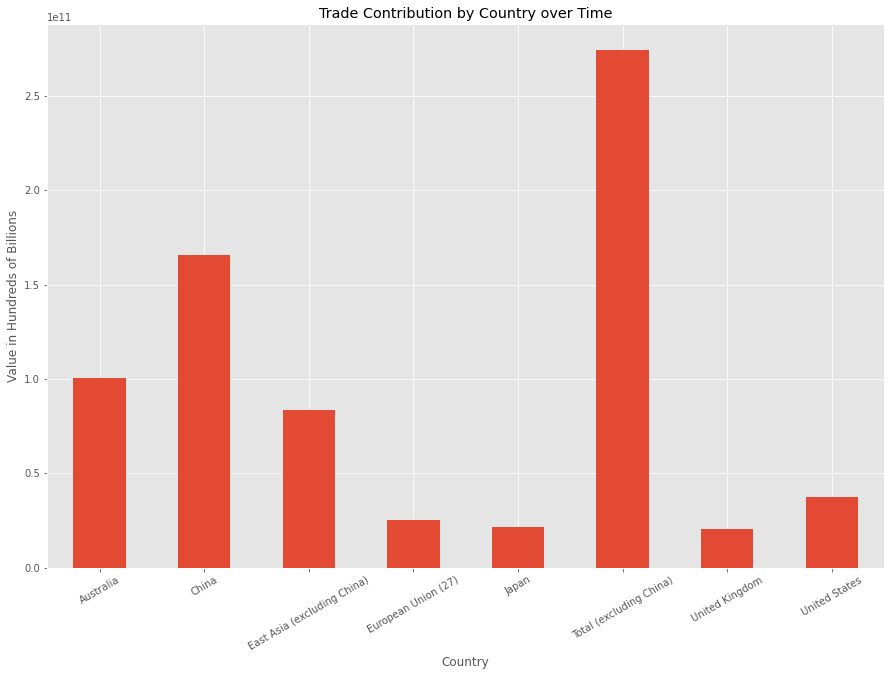

In [71]:
##code to create a bar chart for comparisons

plt.figure(figsize=(15,10))
plt.title(label='Trade Contribution by Country over Time')
plt.ylabel(ylabel='Value in Hundreds of Billions')
td_contrib = td_doll.loc[(td_doll['Country'] != 'All') & (td_doll['Commodity'] == 'All') & (td_doll['Transport_Mode'] == 'All')]
td_contrib.groupby('Country').Value.sum().plot(kind='bar', rot = 30)

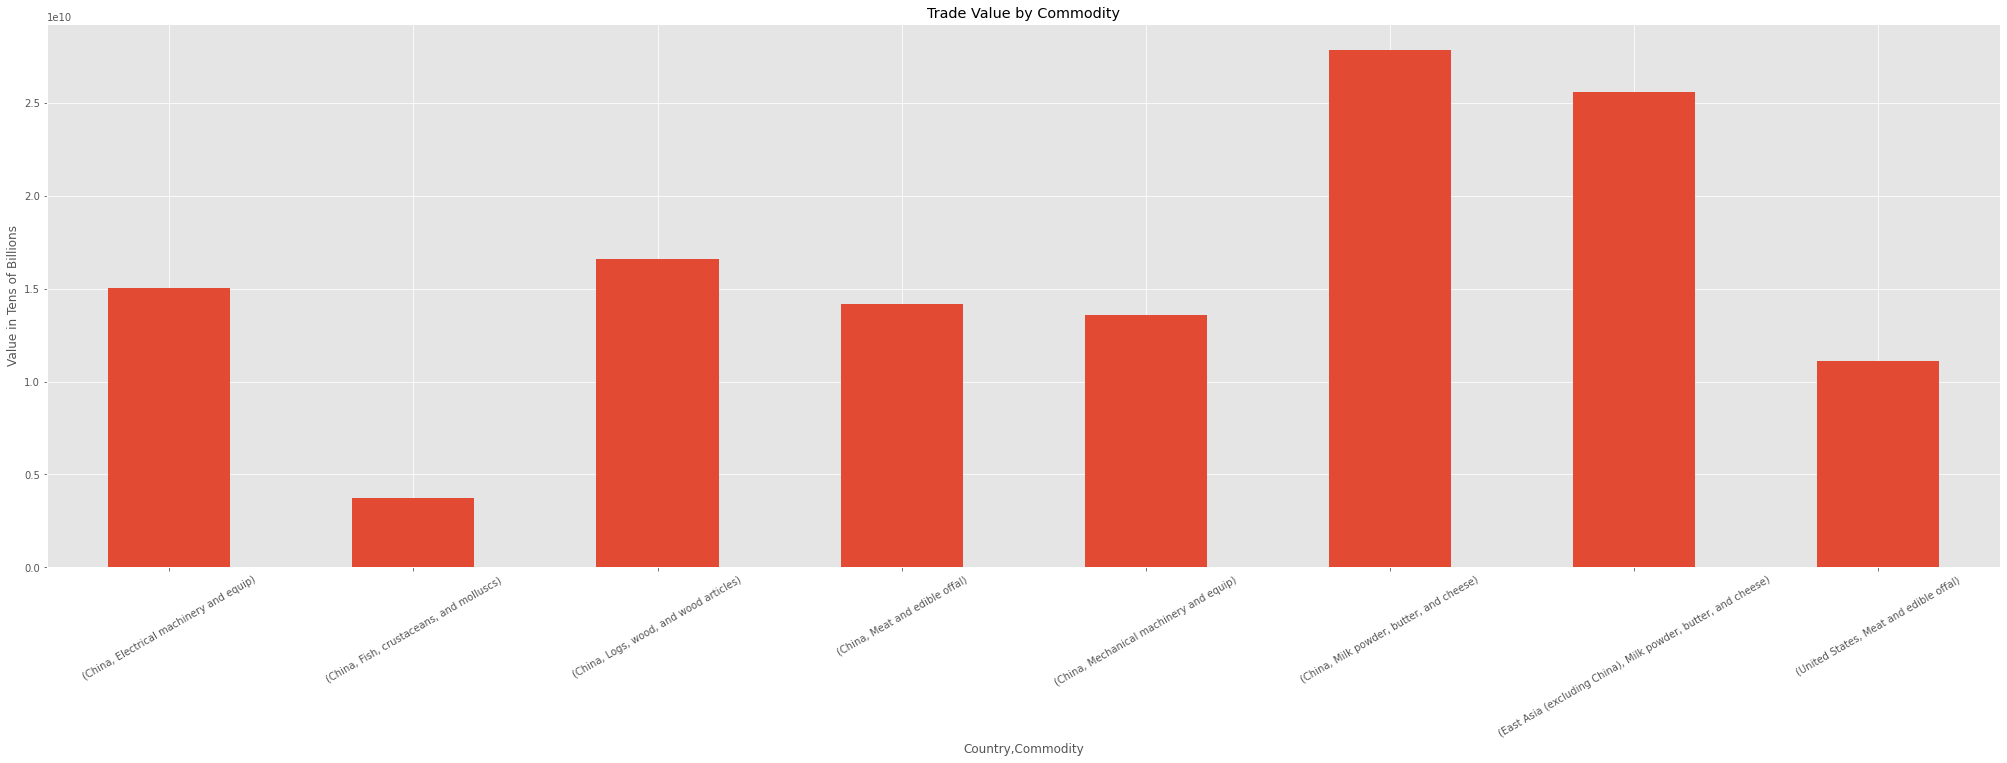

In [46]:
plt.figure(figsize=(35,10))
plt.title(label='Trade Value by Commodity')
plt.ylabel(ylabel='Value in Tens of Billions')
td_contrib = td_doll.loc[(td_doll['Country'] != 'All') & (td_doll['Commodity'] != 'All') & (td_doll['Transport_Mode'] == 'All')]
td_contrib.groupby(['Country', 'Commodity']).Value.sum().plot(kind='bar', rot = 30)

Findings

 

*   From the upper figure, we can see that China itself has the most value of any individual country.
*   From the lower figure, we can see that China is involved in the most subcategories for commodities traded.

After looking at the two bar charts, our assumption on China being the most involved in trade of any single country is correct.



### Q2: What commodity was traded the most in 2019? 2020?

From our dataset, there are multiple ways to view the freqeuncy of trade of any commodity such as by value, weight, and daily frequency. As we understood each metric we found that weight is not a good measure because logs and wood weigh substanitally more than other commodoties so it skewed the data. Value is also not a good measure because fruit is not as expensive as some non food manufactured goods. The scale of one commodity dwarfs the other more specific catergories. The most reasobable measure is daily trade for each commodity catergory.

Text(0, 0.5, 'Days Traded in 2019')

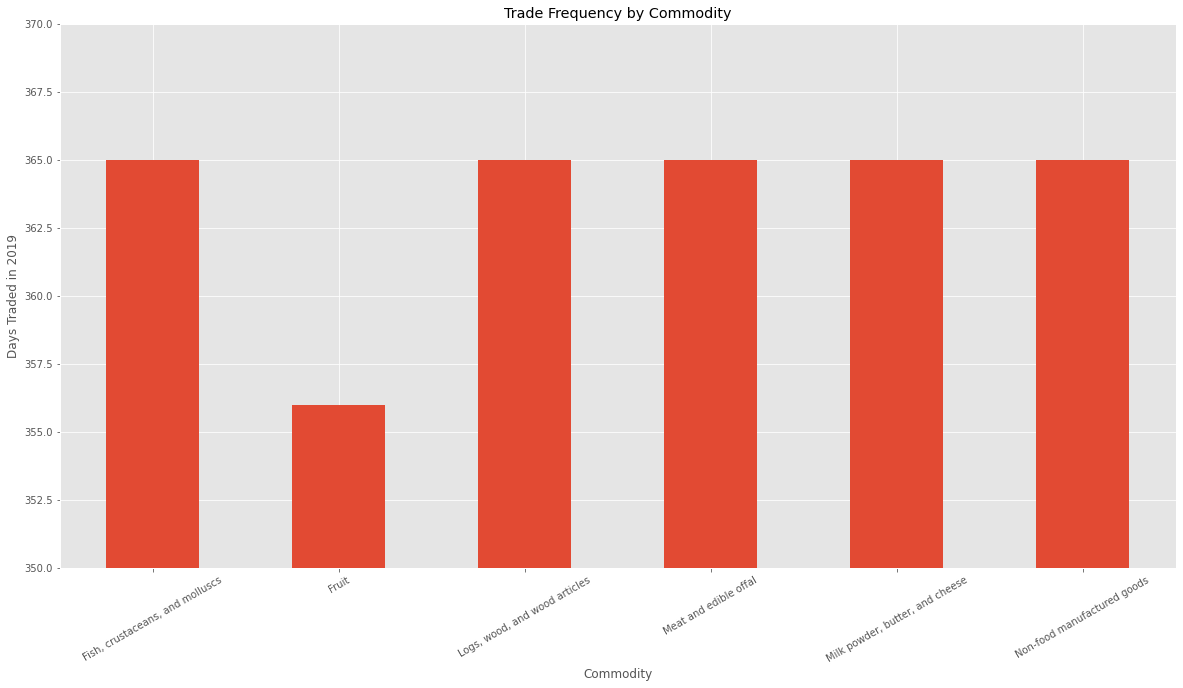

In [72]:
td_chart2 = td_doll.loc[(td_doll['Commodity'] != 'All') & (td_doll['Direction'] == 'Exports') & (td_doll['Country'] == 'All') & (td_doll['Transport_Mode'] == 'All')& (td_doll['Value']!= 0) & (td_doll['Year'] == 2019)]
plt.figure(figsize = (20,10))
td_chart2.groupby('Commodity').Commodity.count().plot(kind='bar', rot = 30)
plt.ylim(350,370)
plt.title(label='Trade Frequency by Commodity')
plt.ylabel(ylabel='Days Traded in 2019')

Text(0, 0.5, 'Days Traded in 2020')

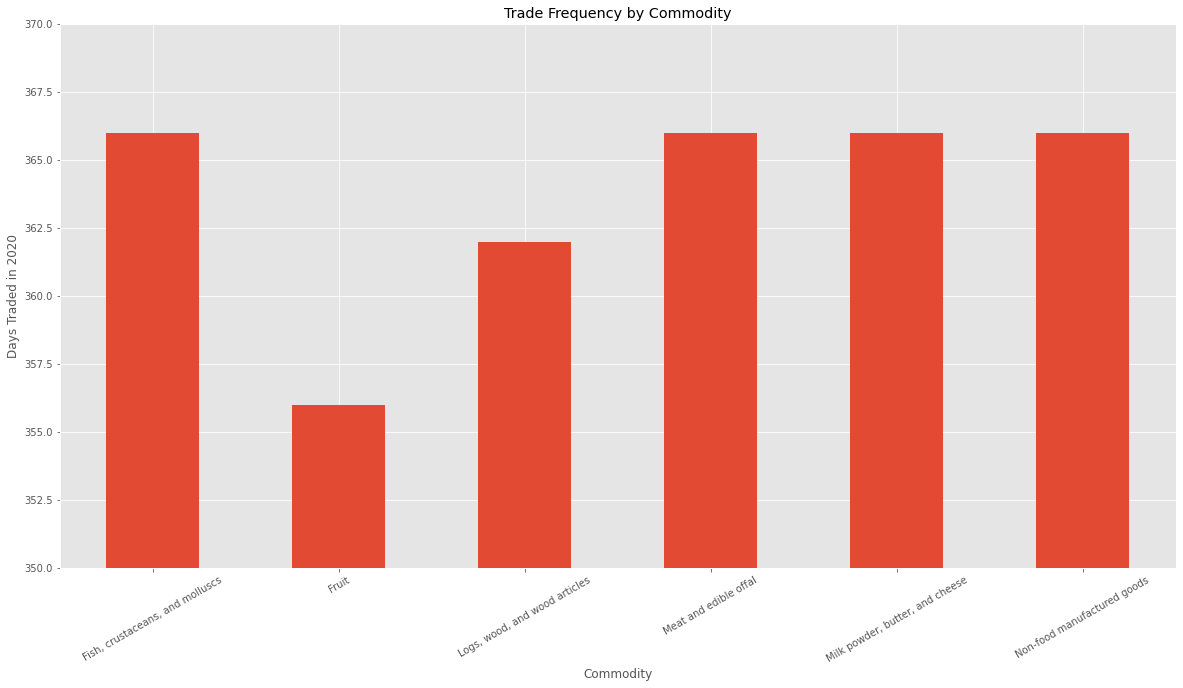

In [74]:
td_chart3 = td_doll.loc[(td_doll['Commodity'] != 'All') & (td_doll['Direction'] == 'Exports') & (td_doll['Country'] == 'All') & (td_doll['Transport_Mode'] == 'All')& (td_doll['Value']!= 0) & (td_doll['Year'] == 2020)]
plt.figure(figsize = (20,10))
td_chart3.groupby('Commodity').Commodity.count().plot(kind='bar', rot = 30)
plt.ylim(350,370)
plt.title(label='Trade Frequency by Commodity')
plt.ylabel(ylabel='Days Traded in 2020')

Text(0, 0.5, 'Value of Goods Traded in Bilions')

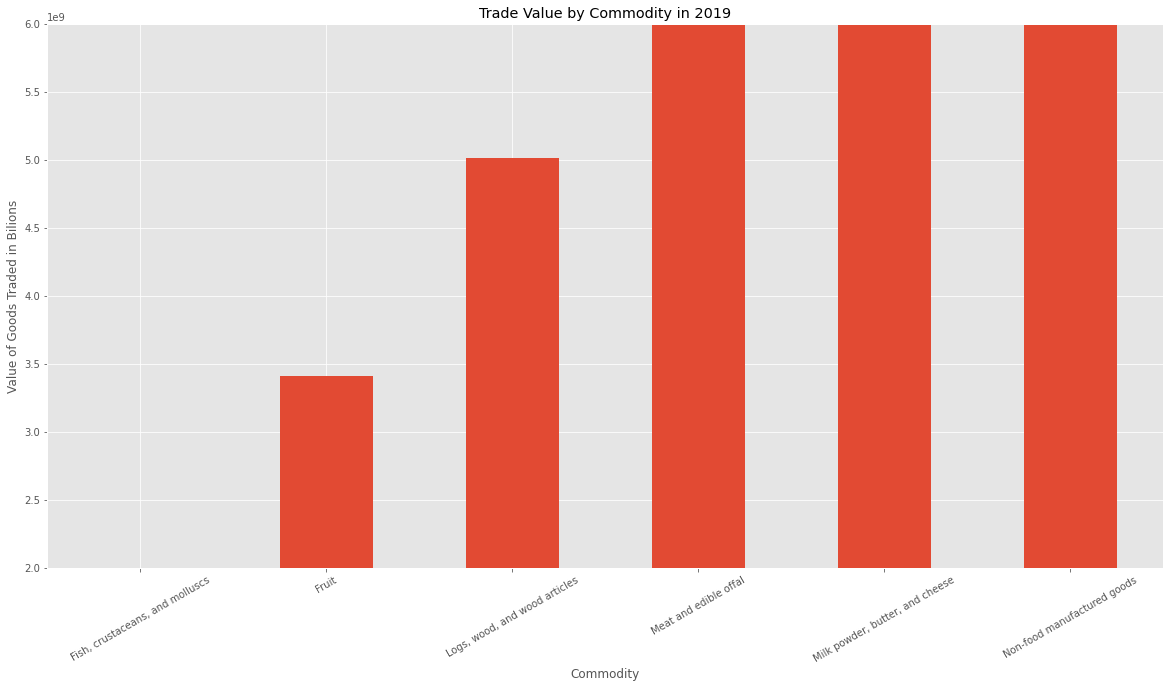

In [75]:
td_chart4 = td_doll.loc[(td_doll['Commodity'] != 'All') & (td_doll['Direction'] == 'Exports') & (td_doll['Country'] == 'All') & (td_doll['Transport_Mode'] == 'All')& (td_doll['Value']!= 0) & (td_doll['Year'] == 2019)]
plt.figure(figsize = (20,10))
td_chart4.groupby('Commodity').Value.sum().plot(kind='bar', rot = 30)
plt.ylim(2000000000,6000000000)
plt.title(label='Trade Value by Commodity in 2019')
plt.ylabel(ylabel='Value of Goods Traded in Bilions')

Text(0, 0.5, 'Value of Goods Traded in Bilions')

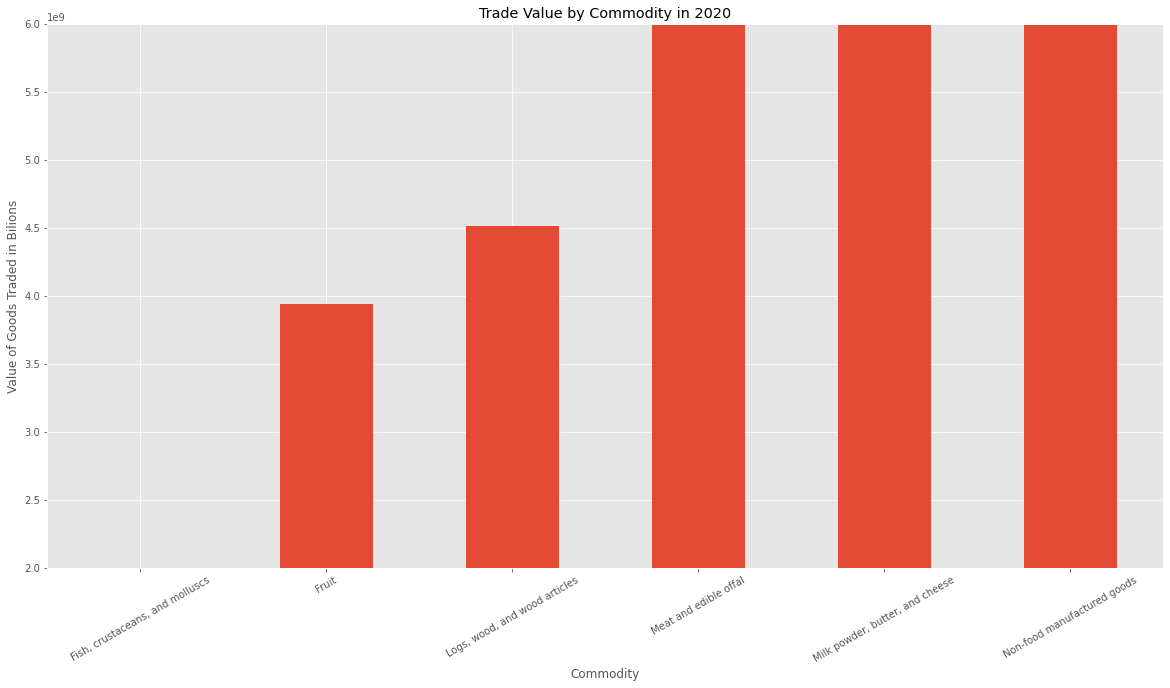

In [76]:
td_chart5 = td_doll.loc[(td_doll['Commodity'] != 'All') & (td_doll['Direction'] == 'Exports') & (td_doll['Country'] == 'All') & (td_doll['Transport_Mode'] == 'All')& (td_doll['Value']!= 0) & (td_doll['Year'] == 2020)]
plt.figure(figsize = (20,10))
td_chart5.groupby('Commodity').Value.sum().plot(kind='bar', rot = 30)
plt.ylim(2000000000,6000000000)
plt.title(label='Trade Value by Commodity in 2020')
plt.ylabel(ylabel='Value of Goods Traded in Bilions')

Findings



*   From the first two charts we see that logs, wood, and wood articles decreases in trade frequency from 2019 to 2020.
*   From the last two charts we see that because of the decrease in frequency, the value of the logs, wood, and wood articles decreases from 2019 to 2020.


Overall, in 2019, every commodity was traded every day except for fruit. In 2020, it was the same as 2019 except for logs that were traded 3 days less than 2019 with about a 500M$ difference in value.

### Q3: How was China's trade impacted by COVID in 2020 compared to other countries?

The COVID-19 pandemic began at the end of 2019 in Wuhan, China. The virus expanded from there, becoming present in most of China's provinces by January of 2020. Soon after, the US began to shut down the country, starting in March of 2020. Every wave since the first has been less severe, so we'll focus on the economic impact in the beginning of 2020.

The graph below shows trade volume over time for China and the US, highlighting when the pandemic began in each country respectively. Value is in billions.

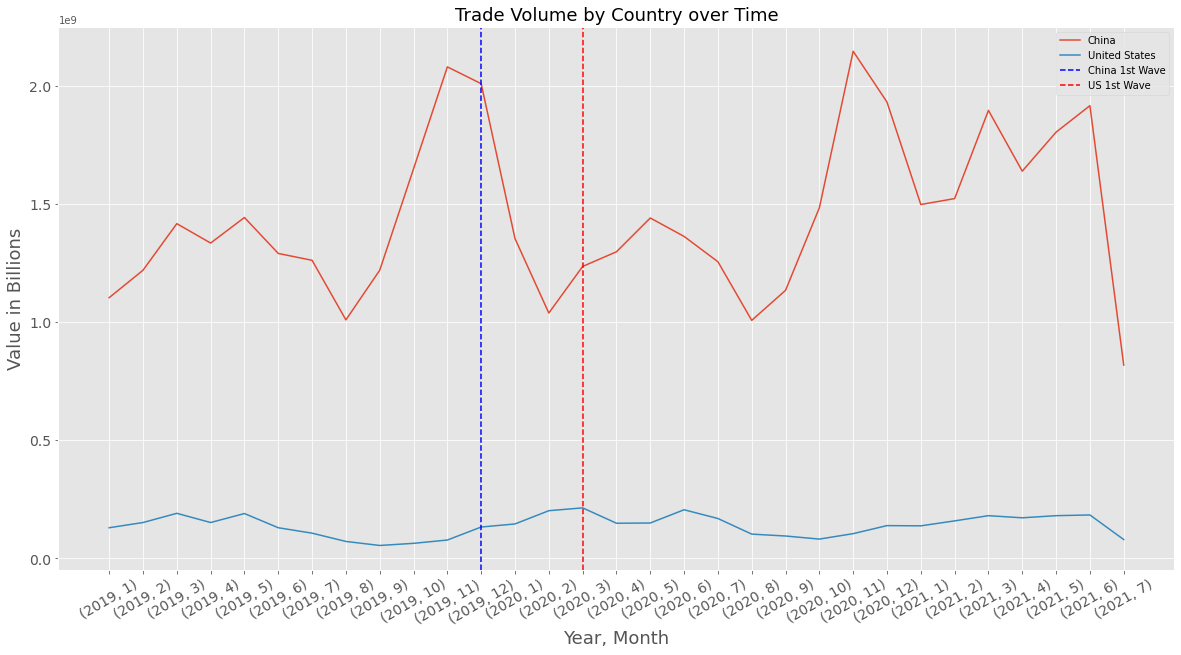

In [77]:
# Filters the data frame based on the needs of the graph
# Will only show China and the US from 2019 on
td_chart3A = td_doll.loc[((td_doll['Country'] == 'China') | (td_doll['Country'] == 'United States')) & (td_doll['Commodity'] != 'All') & (td_doll['Transport_Mode'] == 'All') & (td_doll['Year'] >= 2019)]

# Pivots the data by Year and Month to be used as the chart
c3A = td_chart3A.pivot_table(index=['Year','Month'], columns=['Country'],
                    values='Value', aggfunc='sum')

# Creates the chart plot
c3A.plot(figsize=(20, 10),fontsize=14,rot = 30)

# Creates labels
plt.title(label='Trade Volume by Country over Time',fontsize=18)
plt.xlabel(xlabel='Year, Month',fontsize=18)
plt.ylabel(ylabel='Value in Billions',fontsize=18)

# Adds vertical lines for when the first wave of the pandemic began
plt.axvline(x=11, color='blue', linestyle='--',label='China 1st Wave') # Draws line on 12th axis line (starting at 0) which is January 2020
plt.axvline(x=14, color='Red', linestyle='--',label='US 1st Wave') # Draws line on 14th axis line (starting at 0) which is March 2020

# Adds more labels on the x-axis and assigns the Year, Month label names
plt.xticks(np.arange(31), c3A.index)
plt.legend() # Shows the legend

A second graph is shown below to better highlight how the United States was impacted by the pandemic. This graph doesn't show China, making the decline more evident.

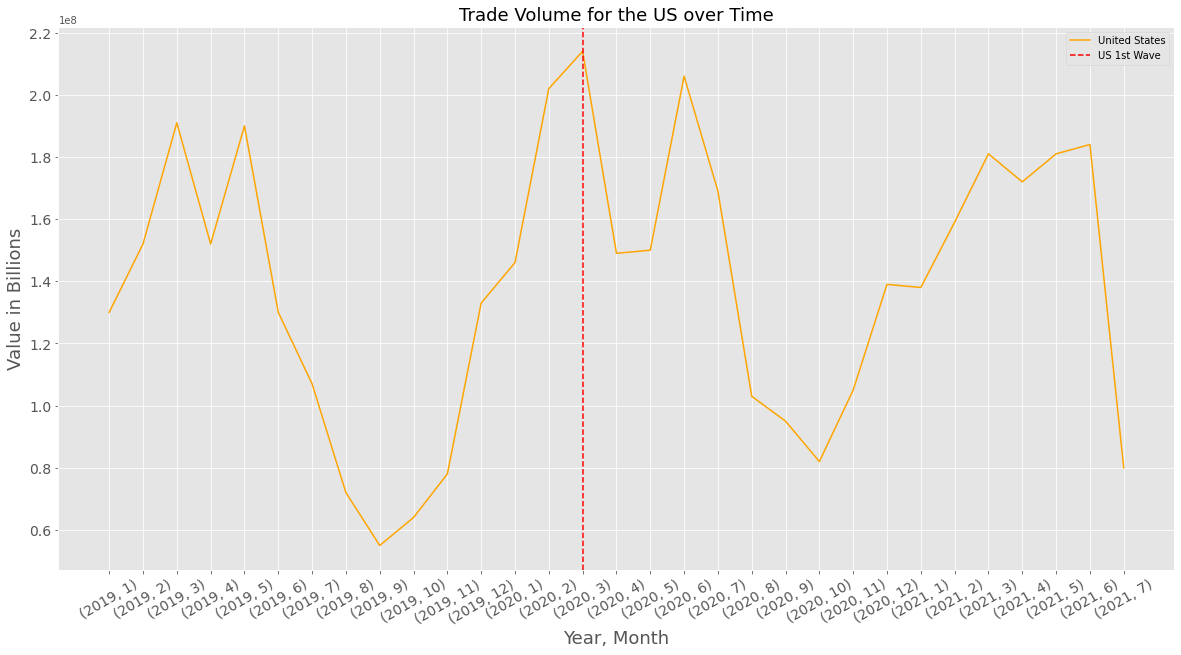

In [78]:
# Filters the data frame based on the needs of the graph
# Will only show China and the US from 2019 on
td_chart3B = td_doll.loc[(td_doll['Country'] == 'United States') & (td_doll['Commodity'] != 'All') & (td_doll['Transport_Mode'] == 'All') & (td_doll['Year'] >= 2019)]

# Pivots the data by Year and Month to be used as the chart
c3B = td_chart3B.pivot_table(index=['Year','Month'], columns=['Country'],
                    values='Value', aggfunc='sum')

# Creates the chart plot
c3B.plot(figsize=(20, 10),fontsize=14,rot = 30,color='Orange')

# Creates labels
plt.title(label='Trade Volume for the US over Time',fontsize=18)
plt.xlabel(xlabel='Year, Month',fontsize=18)
plt.ylabel(ylabel='Value in Billions',fontsize=18)

# Adds vertical lines for when the first wave of the pandemic began
plt.axvline(x=14, color='Red', linestyle='--',label='US 1st Wave') # Draws line on 14th axis line (starting at 0) which is March 2020

# Adds more labels on the x-axis and assigns the Year, Month label names
plt.xticks(np.arange(31), c3B.index)
plt.legend() # Shows the legend

Findings



*   The upper figure shows a decrease in trade volume by value once shut downs began in China and the United States.
*   The lower figure shows that the shutdown and general reopening of the United States is apparent in trade value.


The graphs above make it clear that following the COVID outbreak, both countries went into a state of quarantine which ultimately disrupted internation trade patterns.

### Q4: How was China affected in terms of value of imports vs exports?

To build off the comparison in question three, we can ask how China was impacted in terms of the amount of resources being brought in an sent to other countries. This is a sign of how much they're producing, whether they're refining raw imports and exporting finished goods.

Below is a graph showing trade over time again except here its broken out by imports and exports.

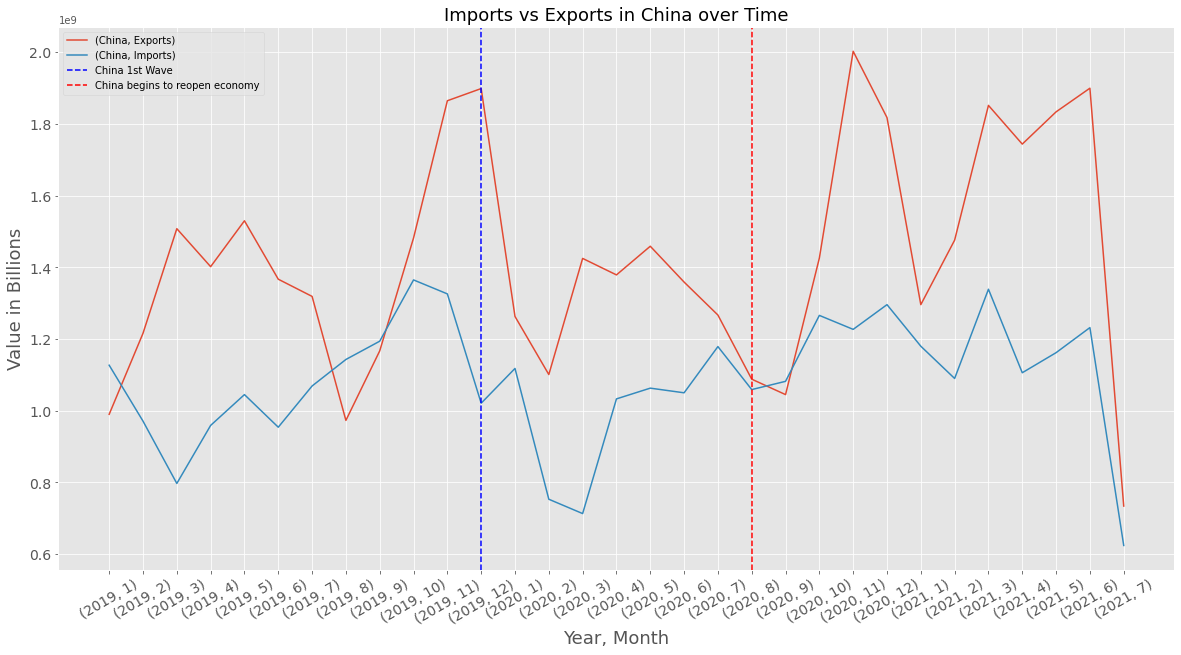

In [80]:
# Filters the data frame based on the needs of the graph
# Will only show China from 2019 on
td_chartq4 = td_doll.loc[(td_doll['Country'] == 'China') & (td_doll['Commodity'] == 'All') & (td_doll['Transport_Mode'] == 'All') & (td_doll['Year'] >= 2019)]

# Pivots the data by Year and Month to be used as the chart
c4 = td_chartq4.pivot_table(index=['Year','Month'], columns=['Country','Direction'],
                    values='Value', aggfunc='sum')

# Creates the chart plot
c4.plot(figsize=(20, 10),fontsize=14,rot = 30)

# Creates labels
plt.title(label='Imports vs Exports in China over Time',fontsize=18)
plt.xlabel(xlabel='Year, Month',fontsize=18)
plt.ylabel(ylabel='Value in Billions',fontsize=18)

# Adds vertical lines for when the first wave of the pandemic began
plt.axvline(x=11, color='blue', linestyle='--',label='China 1st Wave') # Draws line on 12th axis line (starting at 0) which is January 2020
plt.axvline(x=19, color='Red', linestyle='--',label='China begins to reopen economy') # Draws line on 14th axis line (starting at 0) which is March 2020

# Adds more labels on the x-axis and assigns the Year, Month label names
plt.xticks(np.arange(31), c3B.index)
plt.legend() # Shows the legend

Findings



*   The figure shows a very clear decline in China's exports when the pandemic began for them, as well as a clear increase when they reopened the country during the summer of 2020.
*   The figure also shows a decrease and increase in China's imports on the same timeline.


The dash lines show when the pandemic began (blue dash) and when China started to reopen their economy (red dash). Assuming China mainly imports raw materials it makes sense imports are less than exports, which are likely finished goods.

The decline at the turn of 2020 is very clear for exports, China was trying to limit global exposure. Imports decline as well but not as severely and by the time the country reopened their economy this figure has already recovered. We again witness a bullwhip affect with exports as they rise.

#**SECTION 5 - Next Steps and Lessons Learned**



### Next Steps

After conducting this analysis, we would suggest to manufacturers to look at the timeframe it took for important international trade countries such as China and the United States to recover from the shut-downs due to the pandemic. A couple things we would want to look into are:


Direct
1.   Further breakdowns into the specific commodity trading by countries such as more detailed groupings.
2.   What commodities were affected by country shutdowns based on monetary value.
3. Who countries are trading with.
4. Look at other waves of the pandemic.

Indirect
1. How currency values changed across countries.
2. How to prepare for such a situation if there were to be more shut downs.

To complete these steps, we would need to find plenty more data than what our current dataset has now, as well as more time to pass which is after the end of this course.

### Lessons Learned and Techincal Challenges

While doing this analysis, we learned multiple aspects of using Python for data analysis. We started by presenting our data and exploring it to prep it for analysis such as looking at data types, describing the table to see descriptive statistics, and cleaning our data by checking for missing values.

On top of those, we also used different features such as pandas and matplotlib to dig into our data, edit our data, and visualize it to help answer analytical questions.

As for technical challenges, we would have to tinker around with our tables quite often as there were errors that would arrive. We never had any serious problems that we were stuck on, just smaller ones that were very managable to fix. We used prior class lessons to review how to put charts together.

One issue we did run into that wasn't code related was the lack of data within the dataset. We wanted to break down each country based on commodity groupings but our dataset only provided a full breakdown for China. Everything else was grouped as "All".